In [45]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests,adfuller
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.vector_ar.vecm import VECM
from pylab import rcParams
rcParams['figure.figsize']=10,6

In [5]:
data_r = pd.read_csv('Raotbl6.csv', parse_dates=['date'], index_col='date')

In [6]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1959-01-01 to 1989-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rgnp    123 non-null    float64
 1   pgnp    123 non-null    float64
 2   ulc     123 non-null    float64
 3   gdfco   123 non-null    float64
 4   gdf     123 non-null    float64
 5   gdfim   123 non-null    float64
 6   gdfcf   123 non-null    float64
 7   gdfce   123 non-null    float64
dtypes: float64(8)
memory usage: 8.6 KB


In [10]:
for col in data_r.columns:
    adf1 = adfuller(np.log(data_r[col]).diff().diff().dropna())
    print(col)
    print('ADF' ,adf1[0])
    print('p-value:', adf1[1])

rgnp
ADF -7.2807757799938
p-value: 1.5024466497451647e-10
pgnp
ADF -11.221558252406405
p-value: 2.0076158217199926e-20
ulc
ADF -12.102836736209781
p-value: 1.9999493929732533e-22
gdfco
ADF -9.471515762170718
p-value: 4.0942390522063635e-16
gdf
ADF -4.862745141499653
p-value: 4.119003962025036e-05
gdfim
ADF -12.677624884369823
p-value: 1.2061733088614548e-23
gdfcf
ADF -5.646969459628131
p-value: 1.0061734706657987e-06
gdfce
ADF -4.76965829243942
p-value: 6.214015371952536e-05


C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\muneeb.ahmad\Anaconda3

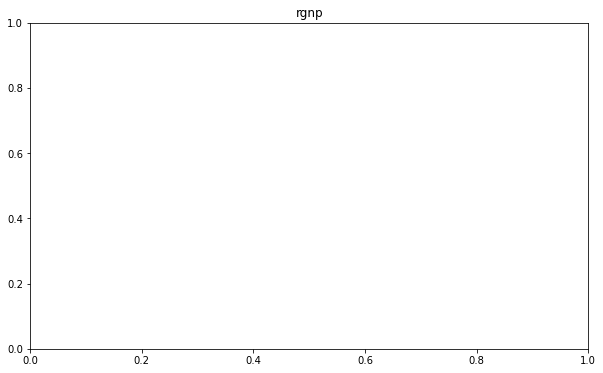

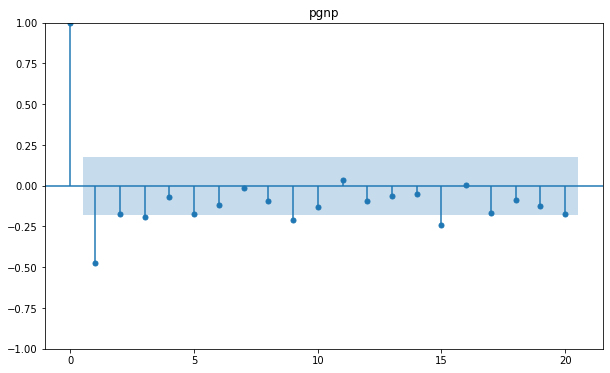

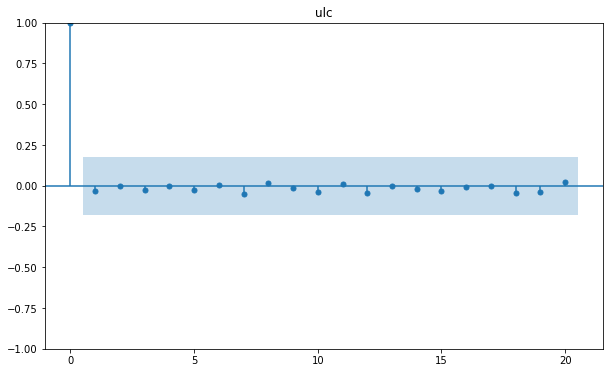

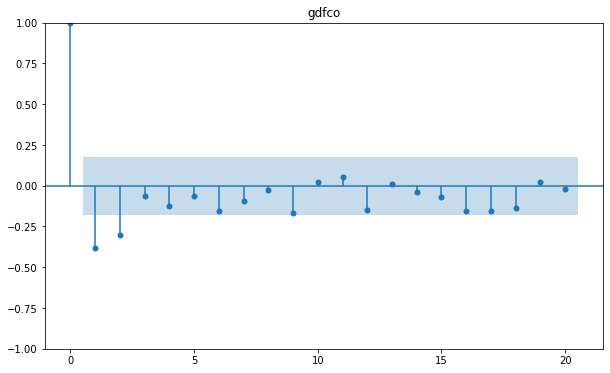

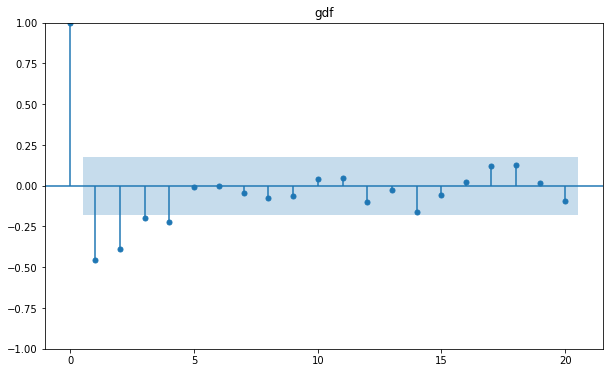

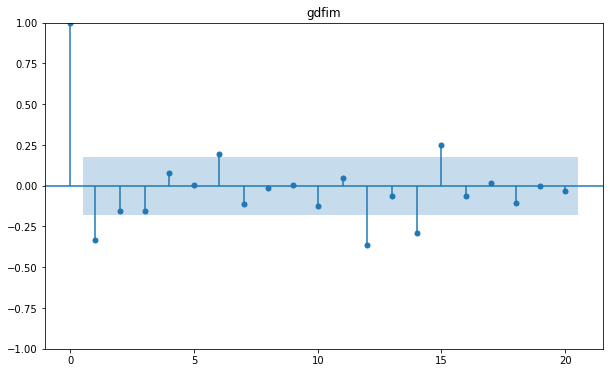

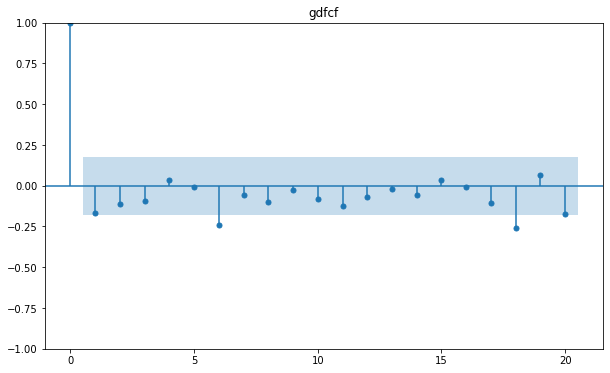

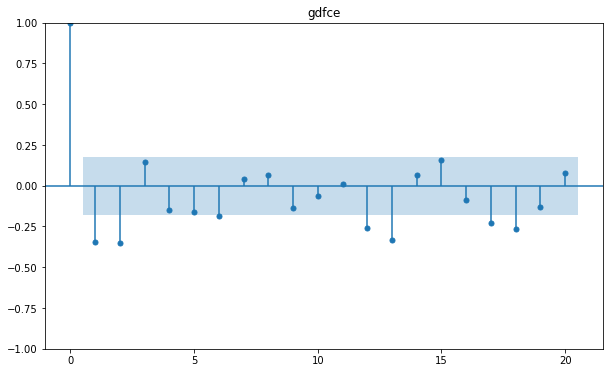

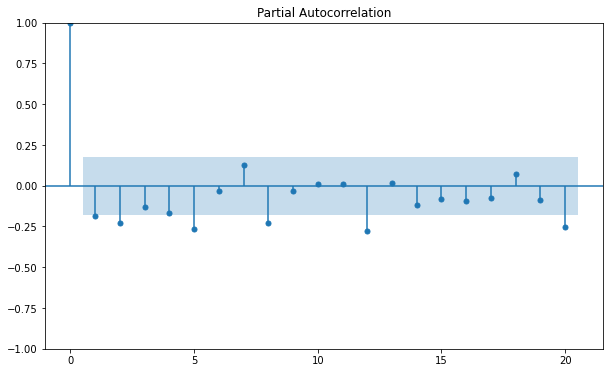

In [12]:
for col in data_r.columns:
    plt.title(col)
    pacf = plot_pacf(np.log(data_r[col]).diff().diff().dropna(),lags = 20)

In [20]:
diff_data = np.log(data_r).diff().diff().dropna()

# VAR
1. The VAR model is a generalization of the univariate autoregressive (AR) model and the multivariate linear regression model.

2. One advantage of the VAR model is that it can be easily estimated using OLS. 

3. Another advantage is that it can be used to make forecasts. 

4. One disadvantage of the VAR model is that it can be difficult to interpret as it can be hard to determine which time-series variables are influencing each other.

In [22]:
model = VAR(diff_data)

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [23]:
model.fit().summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Oct, 2022
Time:                     18:23:39
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -82.1540
Nobs:                     120.000    HQIC:                  -83.1473
Log likelihood:           3739.41    FPE:                3.94086e-37
AIC:                     -83.8265    Det(Omega_mle):     2.20965e-37
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.000002         0.000972            0.002           0.998
L1.rgnp         -0.541125         0.109487           -4.942           0.000
L1.pgnp         -2.007344         5.148853           -0.390           0.697
L1.ul

In [32]:
fitted =model.fit(maxlags = 12 , ic="aic")

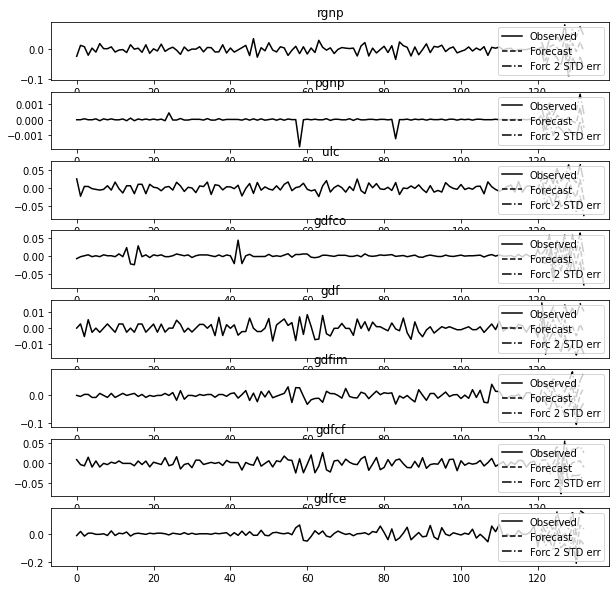

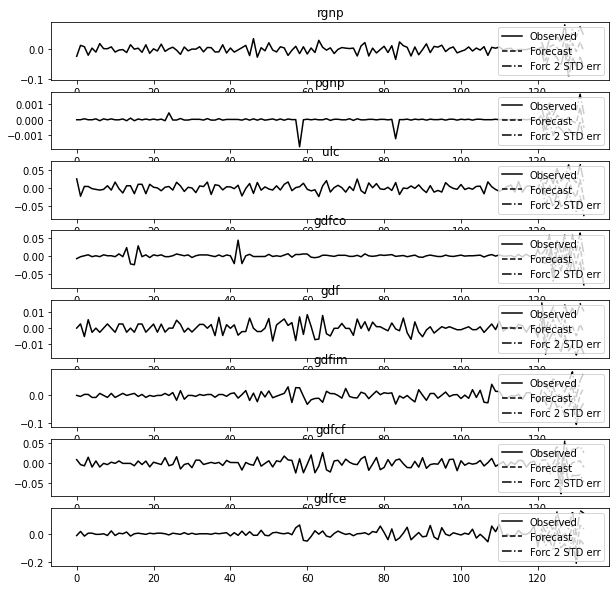

In [33]:
fitted.plot_forecast(12)

# VECM
1. The Vector Error Correction Model (VECM) is a type of time-series model that is often used for forecasting economic data.

2. VECM is an extension of the traditional vector autoregression (VAR) model. 

3. The VECM has several advantages over the VAR model. 

4. First, it is easier to interpret the results of a VECM than a VAR.

5. The VECM can be used to test for co-integration among time series variables, while the VAR cannot. 

6. VECM can be applied to non-stationary time series data, while the VAR cannot.

In [36]:
std_data = (data_r-data_r.mean()) /data_r.std()

In [38]:
vec_rank1 = vecm.select_coint_rank(std_data, det_order = 0, k_ar_diff = 1,method='trace',signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   8          296.5          171.1
  1   8          211.5          136.0
  2   8          140.4          105.0
  3   8          89.92          77.82
  4   8          46.38          54.68
-------------------------------------


In [39]:
vec_rank2 = vecm.select_coint_rank(std_data, det_order = 0, k_ar_diff = 1,method='maxeig',signif=0.1)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 10% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          84.99          49.29
  1   2          71.14          43.29
  2   3          50.46          37.28
  3   4          43.54          31.24
  4   5          23.39          25.12
-------------------------------------


In [43]:
lag_order = vecm.select_order(data=std_data, maxlags=10, deterministic="ci")
lag_order.summary()

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was 

,AIC,BIC,FPE,HQIC
0,-71.02,-69.08*,1.437e-31,-70.23
1,-71.85,-68.35,6.392e-32,-70.43*
2,-71.86,-66.81,6.659e-32,-69.81
3,-71.69,-65.09,8.606e-32,-69.01
4,-71.79,-63.64,9.013e-32,-68.48
5,-71.90,-62.20,1.017e-31,-67.97
6,-71.74,-60.48,1.689e-31,-67.18
7,-72.29,-59.47,1.628e-31,-67.09
8,-73.49,-59.12,1.026e-31,-67.66
9,-75.65,-59.72,3.512e-32,-69.19


In [46]:
vecm = VECM(endog= std_data, k_ar_diff= 1 ,coint_rank=1 , deterministic="ci").fit()

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [47]:
vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.rgnp,0.0496,0.119,0.418,0.676,-0.183,0.282
L1.pgnp,0.5299,0.487,1.089,0.276,-0.424,1.484
L1.ulc,-0.5059,0.257,-1.970,0.049,-1.009,-0.002
L1.gdfco,0.1459,0.386,0.378,0.706,-0.612,0.903
L1.gdf,-1.3338,0.767,-1.740,0.082,-2.836,0.169
L1.gdfim,-0.0833,0.129,-0.648,0.517,-0.335,0.169
L1.gdfcf,0.4104,0.234,1.754,0.079,-0.048,0.869
L1.gdfce,0.0243,0.091,0.268,0.789,-0.153,0.202
,coef,std err,z,P>|z|,[0.025,0.975]
L1.rgnp,-0.0013,0.002,-0.543,0.587,-0.006,0.003


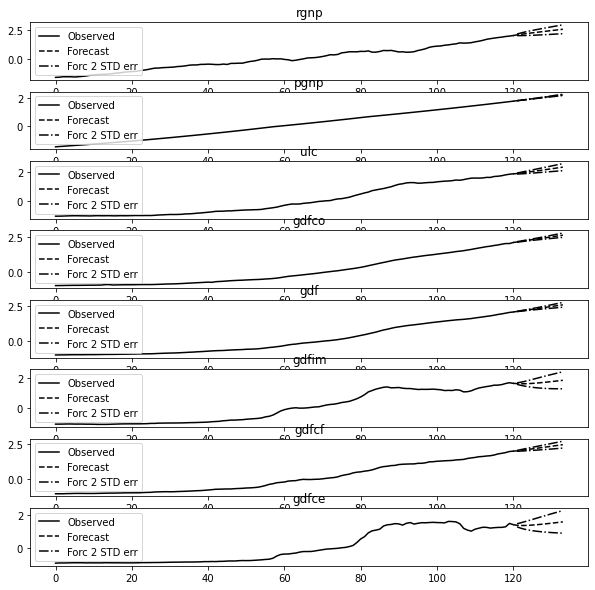

In [49]:
vecm.plot_forecast(13)